## Problem statement

• The open-pit mine is facing problems of inefficient production and is losing
customers' trust as they are not able to meet their demands even though
there has been no surge in demand.

• The mine has operations such as the digging of ore and crushing of ore into a
finer composition where this ore gets transported between the diggers and
crushers using transportation trucks.

• Need to build a smart live monitoring system and need to understand the key
metrics explained by the client.

In [1]:
#importing all the important libraries like numpy. pandas, matlplolib, and warnings to keep notebook clean
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

### Importing DataSet 1 - CycleData

In [2]:
#importing File
CD = pd.read_csv(r'E:\DATA SCIENCE LAST\CAPSTONE\Inputs\CycleData.csv')

In [3]:
CD.info('All')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47344 entries, 0 to 47343
Data columns (total 93 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   ASSOCPAYLOADNOMINAL                         21992 non-null  float64
 1   AT Available Time (iMine)                   47344 non-null  int64  
 2   Autonomous                                  44582 non-null  float64
 3   Available SMU Time                          47344 non-null  int64  
 4   Available Time                              47344 non-null  int64  
 5   Completed Cycle Count                       47344 non-null  int64  
 6   COMPLETEDCYCLEDURATION                      47344 non-null  int64  
 7   Creation Mode                               47344 non-null  int64  
 8   CT Calendar SMU Time                        47344 non-null  int64  
 9   CT Calendar Time                            47344 non-null  int64  
 10  Cycle Dura

In [4]:
CD.shape

(47344, 93)

In [5]:
CD.describe()

,ASSOCPAYLOADNOMINAL,AT Available Time (iMine),Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Creation Mode,CT Calendar SMU Time,CT Calendar Time,...,Travelling Empty Duration,Travelling Full Duration,TRUCKQUEUEATSOURCEDURATION,UNSCHEDULEDDOWNCOUNT,UNSCHEDULEDDOWNTIME,WAITFORDUMPDURATION,WAITFORLOADDURATION,WORKINGBURNRATE,WORKINGDURATION,Crew OID
count,21992.000000,47344.000000,44582.000000,4.734400e+04,47344.000000,47344.000000,47344.000000,47344.000000,4.734400e+04,47344.00000,...,44582.000000,44582.000000,21992.000000,47344.0,47344.000000,22590.000000,22590.0,47344.000000,47344.000000,4.734400e+04
mean,236726.082212,1669.828299,0.505944,1.029385e+03,1669.828299,0.953954,1316.291526,0.040343,1.218833e+03,1918.58546,...,232.600781,272.520412,172.488905,0.0,379.654402,34.019212,0.0,0.000023,1079.787196,1.072034e+10
std,27839.845082,4524.477286,0.499970,3.950018e+04,4524.477286,0.209587,2649.181559,0.416962,3.962458e+04,5337.67353,...,316.285592,326.533195,231.362611,0.0,3160.908112,87.041427,0.0,0.000160,2809.399233,1.284002e+06
min,0.000000,0.000000,0.000000,-2.426500e+04,0.000000,0.000000,0.000000,0.000000,-4.853000e+04,0.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1.071815e+10
25%,240000.000000,271.000000,0.000000,2.700000e+01,271.000000,1.000000,245.000000,0.000000,3.700000e+01,276.00000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,197.000000,1.071929e+10
50%,240000.000000,868.000000,1.000000,3.760000e+02,868.000000,1.000000,761.000000,0.000000,4.125000e+02,893.00000,...,0.000000,0.000000,93.000000,0.0,0.000000,0.000000,0.0,0.000000,507.000000,1.072034e+10
75%,240000.000000,1581.000000,1.000000,1.326000e+03,1581.000000,1.000000,1546.000000,0.000000,1.344000e+03,1597.00000,...,431.000000,557.000000,243.000000,0.0,0.000000,5.000000,0.0,0.000041,1302.000000,1.072147e+10
max,240000.000000,86400.000000,1.000000,8.577780e+06,86400.000000,1.000000,43023.000000,8.000000,8.577451e+06,86400.00000,...,5299.000000,2715.000000,3005.000000,0.0,43200.000000,1859.000000,0.0,0.021993,43200.000000,1.072258e+10


### Checking Null values

In [6]:
#checking top 50 columns with null values
CD.isna().sum().sort_values(ascending=False).head(50) 

Job Type                                      46545
Source Location Description                   41550
Source Queuing Start Timestamp (GMT8)         31306
Destination Dumping Start Timestamp (GMT8)    25757
TRUCKQUEUEATSOURCEDURATION                    25352
Loading Efficiency                            25352
ASSOCPAYLOADNOMINAL                           25352
PREVIOUSSINKDESTINATION                       24828
End Processor Name                            24803
Destination Location Description              24789
Destination Location Name                     24789
Empty Slope Distance                          24754
Empty Fall Height                             24754
Fuel Used                                     24754
Queuing Duration                              24754
TMPH                                          24754
Empty Travel Duration                         24754
Empty Target Travel Duration                  24754
Empty Slope Length                            24754
Queuing at S

In [7]:
#We can see last 5 are 0, hence changing to top45
CD.isna().sum().sort_values(ascending=False).head(45)

Job Type                                      46545
Source Location Description                   41550
Source Queuing Start Timestamp (GMT8)         31306
Destination Dumping Start Timestamp (GMT8)    25757
TRUCKQUEUEATSOURCEDURATION                    25352
Loading Efficiency                            25352
ASSOCPAYLOADNOMINAL                           25352
PREVIOUSSINKDESTINATION                       24828
End Processor Name                            24803
Destination Location Description              24789
Destination Location Name                     24789
Empty Slope Distance                          24754
Empty Fall Height                             24754
Fuel Used                                     24754
Queuing Duration                              24754
TMPH                                          24754
Empty Travel Duration                         24754
Empty Target Travel Duration                  24754
Empty Slope Length                            24754
Queuing at S

In [8]:
null_cols = ['Cycle SMU Duration','SD_SCHEDULEDDOWNTIME','Cycle Duration','OPERATINGTIME (CAT)','Idle Duration','Queuing Duration']
CD.fillna({col: 0 for col in null_cols}, inplace=True)

In [9]:
#Replacing '1/0' by 'Yes' or 'No' Attributes
CD[['Completed Cycle Count','iMine Availability','Estimated Fuel Used']] = CD[['Completed Cycle Count','iMine Availability','Estimated Fuel Used']].replace({0:'No', 1:'Yes'})
CD[['Source Location is Active Flag','Source Location is Source Flag','Destination Location is Active Flag','Destination Location is Source Flag']]=CD[['Source Location is Active Flag','Source Location is Source Flag','Destination Location is Active Flag','Destination Location is Source Flag']].replace({'N':'No', 'Y':'Yes'})

In [10]:
#Replacing '1/0' by 'Yes' or 'No' Attributes
CD['Autonomous'] = CD[['Autonomous']].apply(lambda x: x.map({0:'No', 1:'Yes'}))
CD['Autonomous'] = CD['Autonomous'].fillna('No')
print(CD['Autonomous'].unique())

['Yes' 'No']


### Null values reaason

When checked in excel, values changes as per the cycle types, hence we will create key table wrt to cycle types

In [11]:
CDAux = CD[CD['Cycle Type'] == 'AuxMobileCycle']
CDAux.head()

,ASSOCPAYLOADNOMINAL,AT Available Time (iMine),Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,Creation Mode,CT Calendar SMU Time,CT Calendar Time,...,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,Crew OID,Job Code Description,Job Code Name,Job Type
9421,NaN,10292,No,2710,10292,Yes,10292,0,2710,10292,...,DZ8027,Dozer Unit,CAT D10T,unknown,unknown,unknown,10722579274,ZZ92,ZZ92-Floor Clean up,NaN
9422,NaN,4571,No,0,4571,No,0,3,82,4571,...,DZ8038,Dozer Unit,CAT D10T,unknown,unknown,unknown,10722579274,PIT WORK,PIT WORK,NaN
9423,NaN,8903,No,8903,8903,Yes,8903,0,9634,8903,...,DZ8038,Dozer Unit,CAT D10T,unknown,unknown,unknown,10722579274,PIT WORK,PIT WORK,NaN
9424,NaN,14442,No,0,14442,Yes,14442,0,0,14442,...,DZ8025,Dozer Unit,CAT D10T,unknown,unknown,unknown,10722579274,PIT WORK,PIT WORK,NaN
9425,NaN,14538,No,14538,14538,Yes,14538,0,14980,14538,...,GR6014,Grader Unit,CAT 16M,unknown,unknown,unknown,10722579274,AI88-JBH1-540-PC-26464,AI88 - H1C1 0540 6314-patternprep,PC


In [12]:
CDAux.isna().sum().sort_values(ascending=False).head(45)

ASSOCPAYLOADNOMINAL                           2762
End Processor Name                            2762
Full Expected Travel Duration                 2762
Full Travel Duration                          2762
iMine Load FCTR Truck                         2762
Loading Count                                 2762
Loading Duration                              2762
Loading Efficiency                            2762
Source Loading End Timestamp (GMT8)           2762
Payload (kg)                                  2762
Payload (t)                                   2762
PREVIOUSSECONDARYMACHINE                      2762
PREVIOUSSINKDESTINATION                       2762
QUEUEATSINKDURATION                           2762
Queuing at Sink Duration                      2762
Queuing at Source Duration                    2762
Source Queuing Start Timestamp (GMT8)         2762
TMPH                                          2762
Travelling Empty Duration                     2762
Travelling Full Duration       

In [13]:
CDAux.shape

(2762, 93)

In [14]:
CDAux.columns[CDAux.isnull().sum() > 1300]
CDAux.drop(CDAux.columns[CDAux.isnull().sum() > 1300], axis=1, inplace=True)

In [15]:
CDAux.shape

(2762, 50)

In [16]:
CDLoader = CD[CD['Cycle Type'] == 'LoaderCycle']
CDLoader.isna().sum().sort_values(ascending=False).head(35)

Job Type                                      21992
Dumping Duration                              21992
End Processor Name                            21992
Empty Travel Duration                         21992
Empty Target Travel Duration                  21992
Empty Slope Length                            21992
Empty Slope Distance                          21992
Empty Rise Height                             21992
Empty Plan Length                             21992
Empty Fall Height                             21992
Empty Expected Travel Duration                21992
Empty EFH Length                              21992
Empty EFH Distance                            21992
Destination Dumping Start Timestamp (GMT8)    21992
Dumping SMU Duration                          21992
Full Travel Duration                          21992
Fuel Used                                     21992
iMine Load FCTR Truck                         21992
PREVIOUSSINKDESTINATION                       21992
QUEUEATSINKD

In [17]:
CDLoader.shape

(21992, 93)

In [18]:
CDLoader.drop(CDLoader.columns[CDLoader.isnull().sum() > 15418], axis=1, inplace=True)
CDLoader.shape

(21992, 63)

In [19]:
CDTruck = CD[CD['Cycle Type'] == 'TruckCycle']
CDTruck.isna().sum().sort_values(ascending=False).head(10)                                                

ASSOCPAYLOADNOMINAL                           22590
Loading Efficiency                            22590
TRUCKQUEUEATSOURCEDURATION                    22590
Job Type                                      22590
Source Location Description                   19693
Source Queuing Start Timestamp (GMT8)          6552
Source Loading Start Timestamp (GMT8)          1079
Source Loading End Timestamp (GMT8)            1079
Destination Dumping Start Timestamp (GMT8)     1003
PREVIOUSSINKDESTINATION                          74
dtype: int64

In [20]:
CDTruck.shape

(22590, 93)

In [21]:
CDTruck.drop(CDTruck.columns[CDTruck.isnull().sum() > 19693], axis=1, inplace=True)
CDTruck.shape

(22590, 89)

We can see Job Type, Source Location Description are common null columns in all cycle types, hence we will drop those. Other columns are null because of other cycle types. Main Cycle data comes from Truk Cycle having less null columns.

#### Creating Movement Table for Truck

In [22]:
Truck_Movement = CDTruck[['Primary Machine Name','Source Location Name','Destination Location Name','Payload (t)','Cycle Start Timestamp (GMT8)',
                         'Cycle End Timestamp (GMT8)','Completed Cycle Count','COMPLETEDCYCLEDURATION','TMPH']]
Truck_Movement.shape

(22590, 9)

In [23]:
Truck_Movement[['Cycle End Timestamp in MM:SS','zero1']] = Truck_Movement['Cycle End Timestamp (GMT8)'].str.split('.',expand=True)

Truck_Movement[['Cycle Start Timestamp in MM:SS','zero2']] = Truck_Movement['Cycle Start Timestamp (GMT8)'].str.split('.',expand=True)

In [24]:
Truck_Movement.drop(columns=['Cycle End Timestamp (GMT8)', 'Cycle Start Timestamp (GMT8)', 'zero1', 'zero2'], inplace=True)

In [25]:
#Inserting Movement ID Column
Truck_Movement.insert(0,"Movement_Id",pd.Series(np.arange(1,22591)))
Truck_Movement.head()

,Movement_Id,Primary Machine Name,Source Location Name,Destination Location Name,Payload (t),Completed Cycle Count,COMPLETEDCYCLEDURATION,TMPH,Cycle End Timestamp in MM:SS,Cycle Start Timestamp in MM:SS
0,1.0,DT5209,DS_OB18_B_PAD,DS_C1,260.3,Yes,737,43525.938,2020-07-20 02:15:42,2020-07-20 02:03:25
1,2.0,DT5209,DS_OB18_B_PAD,DS_C1,224.4,Yes,527,19591.871,2020-07-20 04:58:40,2020-07-20 04:49:53
2,3.0,DT5283,DS_OB18_B_PAD,DS_C1,232.8,Yes,496,21472.049,2020-07-20 05:28:17,2020-07-20 05:20:01
3,4.0,DT5283,DS_OB18_B_PAD,DS_C1,238.1,Yes,714,18281.908,2020-07-20 03:21:49,2020-07-20 03:09:55
4,5.0,DT5283,DS_OB18_B_PAD,DS_C1,228.8,Yes,512,20165.852,2020-07-20 05:02:32,2020-07-20 04:54:00


### Importing DataSet 2 - Delay Data

In [26]:
#importing File
DD = pd.read_csv(r'E:\DATA SCIENCE LAST\CAPSTONE\Inputs\DelayData.csv')
DD.head()

,Delay OID,Description,ECF Class ID,Acknowledge Flag,Acknowledged Flag,Confirmed Flag,Engine Stopped Flag,Field Notification Required Flag,Office Confirm Flag,Production Reporting Only Flag,...,Target Machine is Active Flag,Target Machine Class Name,Target Machine Class Description,Target Machine Class is Active Flag,Target Machine Class Category Name,Delay Reported By Person Name,Delay Reported By User Name,Delay Status Description,Delay Start Timestamp (GMT8),Delay Finish Timestamp (GMT8)
0,10721642969,MACHINE GEN Started a delay: 2110_Operator_Hot...,XAEntity.Delay,N,N,N,N,N,N,Y,...,Y,994H,Wheel Loader,Y,Loader Classes,Daniel Nye,NaN,Historical,2020-07-26 02:04:59,2020-07-26 02:08:41
1,10721643044,6026,XAEntity.Delay,N,N,N,N,Y,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 01:59:06,2020-07-26 02:05:54
2,10721643462,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]],XAEntity.Delay,N,N,N,N,N,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 02:06:13,2020-07-26 02:06:24
3,10721643635,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]] acces...,XAEntity.Delay,N,N,N,N,Y,N,Y,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,NaN,Historical,2020-07-26 02:06:25,2020-07-26 02:23:48
4,10721645207,5271,XAEntity.Delay,N,N,N,N,Y,N,N,...,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,NaN,Casey Ruck,Historical,2020-07-26 02:09:44,2020-07-26 02:15:00


In [27]:
DD.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8782 entries, 0 to 8781
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Delay OID                            8782 non-null   int64  
 1   Description                          6701 non-null   object 
 2   ECF Class ID                         8782 non-null   object 
 3   Acknowledge Flag                     8782 non-null   object 
 4   Acknowledged Flag                    8782 non-null   object 
 5   Confirmed Flag                       8782 non-null   object 
 6   Engine Stopped Flag                  8782 non-null   object 
 7   Field Notification Required Flag     8782 non-null   object 
 8   Office Confirm Flag                  8782 non-null   object 
 9   Production Reporting Only Flag       8782 non-null   object 
 10  Frequency Type                       8782 non-null   int64  
 11  Shift Type                    

In [28]:
DD.columns

Index(['Delay OID', 'Description', 'ECF Class ID', 'Acknowledge Flag',
       'Acknowledged Flag', 'Confirmed Flag', 'Engine Stopped Flag',
       'Field Notification Required Flag', 'Office Confirm Flag',
       'Production Reporting Only Flag', 'Frequency Type', 'Shift Type',
       'Target Location', 'Target Road', 'Workorder Ref', 'Delay Class Name',
       'Delay Class Description', 'Delay Class is Active Flag',
       'Delay Class Category Name', 'Target Machine Name',
       'Target Machine is Active Flag', 'Target Machine Class Name',
       'Target Machine Class Description',
       'Target Machine Class is Active Flag',
       'Target Machine Class Category Name', 'Delay Reported By Person Name',
       'Delay Reported By User Name', 'Delay Status Description',
       'Delay Start Timestamp (GMT8)', 'Delay Finish Timestamp (GMT8)'],
      dtype='object')

In [29]:
Delay_Master = DD[['Delay OID', 'Description','Engine Stopped Flag',
       'Field Notification Required Flag','Delay Class Name','Target Machine Name','Target Machine is Active Flag','Target Machine Class Name',
       'Target Machine Class Description','Target Machine Class is Active Flag', 'Target Machine Class Category Name',
       'Delay Status Description','Delay Start Timestamp (GMT8)', 'Delay Finish Timestamp (GMT8)']]

In [30]:
#Coverting Delay Start and Finish into Timestamp Datatypes
Delay_Master['Delay Start Timestamp (GMT8)'] = Delay_Master['Delay Start Timestamp (GMT8)'].astype('datetime64')

Delay_Master['Delay Finish Timestamp (GMT8)'] = Delay_Master['Delay Finish Timestamp (GMT8)'].astype('datetime64')

In [31]:
#Inserting "Delay Time" Column to know the Measurement
Delay_Master['Delay Time'] = (Delay_Master['Delay Finish Timestamp (GMT8)'] - Delay_Master['Delay Start Timestamp (GMT8)']).astype('timedelta64[s]')

Delay_Master['Delay Time'] = Delay_Master['Delay Time'].astype('int64')

In [32]:
Delay_Master.head()

,Delay OID,Description,Engine Stopped Flag,Field Notification Required Flag,Delay Class Name,Target Machine Name,Target Machine is Active Flag,Target Machine Class Name,Target Machine Class Description,Target Machine Class is Active Flag,Target Machine Class Category Name,Delay Status Description,Delay Start Timestamp (GMT8),Delay Finish Timestamp (GMT8),Delay Time
0,10721642969,MACHINE GEN Started a delay: 2110_Operator_Hot...,N,N,2110_Operator_Hot_Seat,WL7030,Y,994H,Wheel Loader,Y,Loader Classes,Historical,2020-07-26 02:04:59,2020-07-26 02:08:41,222
1,10721643044,6026,N,Y,4070_Wait_on_Access,DT5266,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,Historical,2020-07-26 01:59:06,2020-07-26 02:05:54,408
2,10721643462,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]],N,N,8200 Health Event,DT5271,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,Historical,2020-07-26 02:06:13,2020-07-26 02:06:24,11
3,10721643635,- [STOP_MACHINE : [PRIMARY_POWERTRAIN]] acces...,N,Y,4170_Operator_Equipment_Checks,DT5271,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,Historical,2020-07-26 02:06:25,2020-07-26 02:23:48,1043
4,10721645207,5271,N,Y,7410_Behind_Delayed_Machine,DT5212,Y,CAT 793F CMD,Caterpillar 793 F Autonomous Mining Truck,Y,Truck Classes,Historical,2020-07-26 02:09:44,2020-07-26 02:15:00,316


In [33]:
Delay_Master.groupby('Target Machine Name').agg({'Delay Time':'sum','Target Machine Name':'count'})

,Delay Time,Target Machine Name
Target Machine Name,,
DT4123,458408,8
DT4140,740710,19
DT5162,319304,71
DT5168,102654,93
DT5169,281625,85
...,...,...
WL7030,292186,141
WL7031,741826,1
WL7032,211395,117


### Importing DataSet 3 - Location Data

In [34]:
#importing File
LD = pd.read_csv(r'E:\DATA SCIENCE LAST\CAPSTONE\Inputs\LocationData.csv')
LD.head()

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,23.370670,4067.363348
1,2,DS_JB_Fill,23.378029,3883.118054
2,3,DS_OB18_18EP,23.321309,4202.132688
3,4,DS_OB31B_3,23.317018,4203.555368
4,5,DS_STH_PIT_2,23.393871,3883.003552


In [35]:
LD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Location_Id  31 non-null     int64  
 1   Name         31 non-null     object 
 2   Latitude     31 non-null     float64
 3   Longitude    31 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.1+ KB


After plotting we saw positive lattitude are going far away hnce converting the positive lattitye to negative

In [36]:
mask = LD['Latitude'] > 0
LD.loc[mask, 'Latitude'] = LD.loc[mask, 'Latitude'] * -1
LD

,Location_Id,Name,Latitude,Longitude
0,1,DS_H1C1,-23.370670,4067.363348
1,2,DS_JB_Fill,-23.378029,3883.118054
2,3,DS_OB18_18EP,-23.321309,4202.132688
3,4,DS_OB31B_3,-23.317018,4203.555368
4,5,DS_STH_PIT_2,-23.393871,3883.003552
5,6,DS_W1A2,-23.164861,4202.946825
6,7,DS_W2C2_1,-23.374642,4043.319503
7,8,DS_W55B,-23.378768,4205.860720
8,9,DS_W55B_2,-23.371916,4056.194529
9,10,DS_W55D,-23.371724,4045.024300


### Merging the Location Type Tables in Movement Data

In [37]:
Truck_Movement = Truck_Movement.merge(LD, how='left', left_on=['Source Location Name'], right_on=['Name'])
Truck_Movement = Truck_Movement.merge(LD, how='left', left_on=['Destination Location Name'], right_on=['Name'])

In [38]:
Truck_Movement.columns

Index(['Movement_Id', 'Primary Machine Name', 'Source Location Name',
       'Destination Location Name', 'Payload (t)', 'Completed Cycle Count',
       'COMPLETEDCYCLEDURATION', 'TMPH', 'Cycle End Timestamp in MM:SS',
       'Cycle Start Timestamp in MM:SS', 'Location_Id_x', 'Name_x',
       'Latitude_x', 'Longitude_x', 'Location_Id_y', 'Name_y', 'Latitude_y',
       'Longitude_y'],
      dtype='object')

In [39]:
Truck_Movement.head()

,Movement_Id,Primary Machine Name,Source Location Name,Destination Location Name,Payload (t),Completed Cycle Count,COMPLETEDCYCLEDURATION,TMPH,Cycle End Timestamp in MM:SS,Cycle Start Timestamp in MM:SS,Location_Id_x,Name_x,Latitude_x,Longitude_x,Location_Id_y,Name_y,Latitude_y,Longitude_y
0,1.0,DT5209,DS_OB18_B_PAD,DS_C1,260.3,Yes,737,43525.938,2020-07-20 02:15:42,2020-07-20 02:03:25,NaN,NaN,NaN,NaN,28.0,DS_C1,-23.33208,120.051541
1,2.0,DT5209,DS_OB18_B_PAD,DS_C1,224.4,Yes,527,19591.871,2020-07-20 04:58:40,2020-07-20 04:49:53,NaN,NaN,NaN,NaN,28.0,DS_C1,-23.33208,120.051541
2,3.0,DT5283,DS_OB18_B_PAD,DS_C1,232.8,Yes,496,21472.049,2020-07-20 05:28:17,2020-07-20 05:20:01,NaN,NaN,NaN,NaN,28.0,DS_C1,-23.33208,120.051541
3,4.0,DT5283,DS_OB18_B_PAD,DS_C1,238.1,Yes,714,18281.908,2020-07-20 03:21:49,2020-07-20 03:09:55,NaN,NaN,NaN,NaN,28.0,DS_C1,-23.33208,120.051541
4,5.0,DT5283,DS_OB18_B_PAD,DS_C1,228.8,Yes,512,20165.852,2020-07-20 05:02:32,2020-07-20 04:54:00,NaN,NaN,NaN,NaN,28.0,DS_C1,-23.33208,120.051541


In [40]:
Truck_Movement.drop(columns=['Location_Id_x','Location_Id_y','Name_x', 'Name_y'], inplace=True)
Truck_Movement = Truck_Movement.rename(columns={'Latitude_x': 'Source_Latitude', 'Longitude_x': 'Source_Longitude',
                                               'Latitude_y': 'Dest_Latitude', 'Longitude_y': 'Dest_Longitude'})

In [41]:
Truck_Movement.columns

Index(['Movement_Id', 'Primary Machine Name', 'Source Location Name',
       'Destination Location Name', 'Payload (t)', 'Completed Cycle Count',
       'COMPLETEDCYCLEDURATION', 'TMPH', 'Cycle End Timestamp in MM:SS',
       'Cycle Start Timestamp in MM:SS', 'Source_Latitude', 'Source_Longitude',
       'Dest_Latitude', 'Dest_Longitude'],
      dtype='object')

In [42]:
Truck_Movement['Path'] = Truck_Movement['Source_Latitude'].astype(str) + ', ' + Truck_Movement['Source_Longitude'].astype(str) + ' to ' + Truck_Movement['Dest_Latitude'].astype(str) + ', ' + Truck_Movement['Dest_Longitude'].astype(str)                      

### OEE Calculations

### Creating Key Table

In [43]:
CD.columns

Index(['ASSOCPAYLOADNOMINAL', 'AT Available Time (iMine)', 'Autonomous',
       'Available SMU Time', 'Available Time', 'Completed Cycle Count',
       'COMPLETEDCYCLEDURATION', 'Creation Mode', 'CT Calendar SMU Time',
       'CT Calendar Time', 'Cycle Duration', 'Cycle SMU Duration',
       'Cycle Type', 'Delay Time', 'Down Time', 'DTE Down Time Equipment',
       'Dumping Duration', 'Dumping SMU Duration',
       'Destination Dumping Start Timestamp (GMT8)', 'Empty EFH Distance',
       'Empty EFH Length', 'Empty Expected Travel Duration',
       'Empty Fall Height', 'Empty Plan Length', 'Empty Rise Height',
       'Empty Slope Distance', 'Empty Slope Length',
       'Empty Target Travel Duration', 'Empty Travel Duration',
       'End Processor Name', 'Cycle End Timestamp (GMT8)',
       'Estimated Fuel Used', 'Fuel Used', 'Full Expected Travel Duration',
       'Full Travel Duration', 'IC', 'Idle Duration', 'iMine Availability',
       'iMine Engine Hours', 'iMine Load FCTR Truck', 

In [44]:
Cycle_Master = CD[['Cycle Type', 'Autonomous',
       'Available SMU Time', 'Available Time', 'Completed Cycle Count',
       'COMPLETEDCYCLEDURATION', 'CT Calendar SMU Time',
       'CT Calendar Time', 'Cycle Duration', 'Cycle SMU Duration','Delay Time', 'Down Time', 'DTE Down Time Equipment',
       'Dumping Duration', 'Dumping SMU Duration', 'Empty EFH Distance', 'Empty Expected Travel Duration',
       'Empty Target Travel Duration', 'Empty Travel Duration', 'End Processor Name', 'Estimated Fuel Used', 'Fuel Used', 
       'Full Expected Travel Duration','Full Travel Duration', 'Idle Duration', 'iMine Engine Hours','iMine Operating Hours',
       'Loading Duration', 'Loading Efficiency', 'OPERATINGTIME (CAT)', 'Payload (t)',
       'PREVIOUSSECONDARYMACHINE', 'PREVIOUSSINKDESTINATION', 'QUEUEATSINKDURATION', 'Queuing at Sink Duration', 
       'Queuing at Source Duration', 'Queuing Duration','SD_SCHEDULEDDOWNTIME','SDE_SCHEDULEDDOWNEQUIP','TMPH', 'TOTALTIME (CAT)', 
       'Travelling Empty Duration','Travelling Full Duration', 'UNSCHEDULEDDOWNCOUNT', 'UNSCHEDULEDDOWNTIME',
       'WAITFORDUMPDURATION', 'WAITFORLOADDURATION', 'WORKINGDURATION','IC','TC',
       'Primary Machine Name', 'Primary Machine Category Name', 'Primary Machine Class Name',
       'Secondary Machine Name', 'Secondary Machine Category Name', 'Secondary Machine Class Name', 'ASSOCPAYLOADNOMINAL']]

In [45]:
Cycle_Master['Availability'] = Cycle_Master.apply(lambda row: ((row['CT Calendar Time']-row['SD_SCHEDULEDDOWNTIME'])/ row['CT Calendar Time'])*100 if row['CT Calendar Time'] != 0 else None, axis=1)

In [46]:
Cycle_Master['Performance'] = Cycle_Master.apply(lambda row: ((row['WORKINGDURATION'])/ row['TOTALTIME (CAT)'])*100 if row['TOTALTIME (CAT)'] != 0 else None, axis=1)

In [47]:
Cycle_Master['Quality'] = Cycle_Master.apply(lambda row: ((row['iMine Operating Hours'])/ row['iMine Engine Hours'])*100*(row['IC'])/(row['TC']) if row['iMine Engine Hours'] != 0 else None, axis=1)

In [48]:
Cycle_Master.head()

,Cycle Type,Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,CT Calendar SMU Time,CT Calendar Time,Cycle Duration,Cycle SMU Duration,...,Primary Machine Name,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,ASSOCPAYLOADNOMINAL,Availability,Performance,Quality
0,TruckCycle,Yes,737,737,Yes,737,737,737,737,737,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,92.130258,100.0
1,TruckCycle,Yes,527,527,Yes,527,527,527,527,527,...,DT5209,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,91.650854,100.0
2,TruckCycle,Yes,292,496,Yes,496,264,496,496,292,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,86.693548,100.0
3,TruckCycle,Yes,420,714,Yes,714,403,714,714,420,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,66.806723,100.0
4,TruckCycle,Yes,300,512,Yes,512,300,512,512,300,...,DT5283,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,84.570312,100.0


In [49]:
null_cols1 = ['Availability','Performance','Quality']

In [50]:
Cycle_Master.fillna({col: 0 for col in null_cols1}, inplace=True)

In [51]:
Cycle_Master['OEE'] = (Cycle_Master['Availability']) * (Cycle_Master['Performance']) * (Cycle_Master['Quality']) /10000

In [52]:
Cycle_Master.head()

,Cycle Type,Autonomous,Available SMU Time,Available Time,Completed Cycle Count,COMPLETEDCYCLEDURATION,CT Calendar SMU Time,CT Calendar Time,Cycle Duration,Cycle SMU Duration,...,Primary Machine Category Name,Primary Machine Class Name,Secondary Machine Name,Secondary Machine Category Name,Secondary Machine Class Name,ASSOCPAYLOADNOMINAL,Availability,Performance,Quality,OEE
0,TruckCycle,Yes,737,737,Yes,737,737,737,737,737,...,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,92.130258,100.0,92.130258
1,TruckCycle,Yes,527,527,Yes,527,527,527,527,527,...,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,91.650854,100.0,91.650854
2,TruckCycle,Yes,292,496,Yes,496,264,496,496,292,...,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,86.693548,100.0,86.693548
3,TruckCycle,Yes,420,714,Yes,714,403,714,714,420,...,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,66.806723,100.0,66.806723
4,TruckCycle,Yes,300,512,Yes,512,300,512,512,300,...,Truck Classes,CAT 793F CMD,WL7058,Loader Classes,WA1200,NaN,100.0,84.570312,100.0,84.570312


In [54]:
import sqlalchemy as sq
from sqlalchemy import create_engine

In [ ]:
con = sq.create_engine("mysql://root:@letsdoit123@localhost/openpit")
Cycle_Master.to_sql("CycleMaster",con)
Truck_Movement.to_sql("TruckMovement",con)
Delay_Master.to_sql("DelayMaster",con)
LD.to_sql("LocationMaster",con)

<AxesSubplot:xlabel='Cycle Type', ylabel='count'>

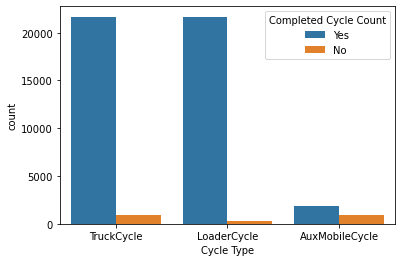

In [56]:
sns.countplot('Cycle Type',hue='Completed Cycle Count', data =Cycle_Master)

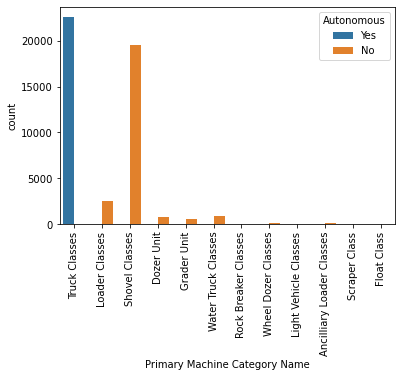

In [57]:
sns.countplot('Primary Machine Category Name',hue='Autonomous', data =Cycle_Master)
plt.xticks(rotation=90)
plt.show()

In [58]:
Cycle_Master_obj = Cycle_Master.select_dtypes(include='object').columns

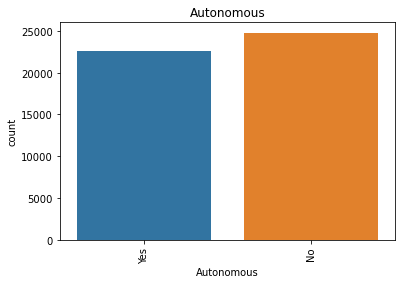

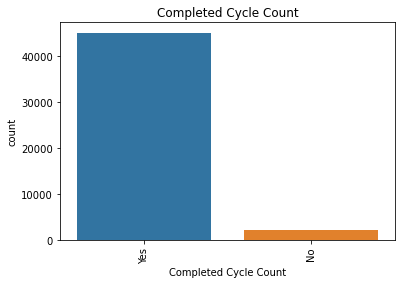

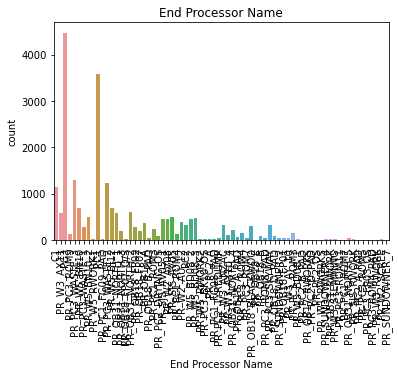

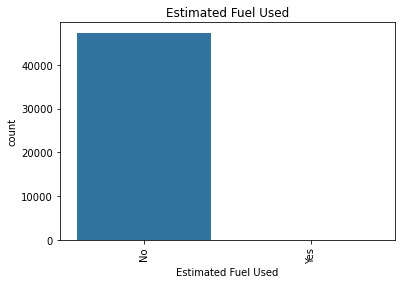

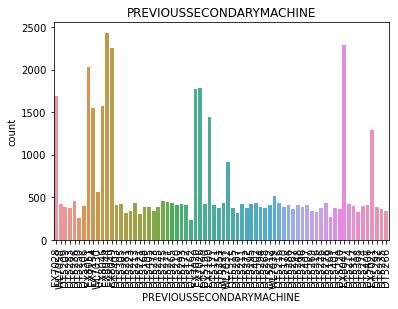

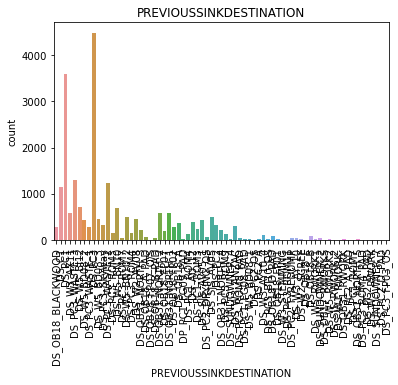

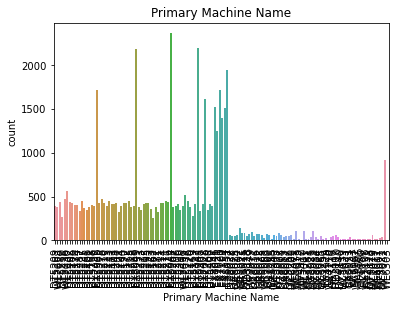

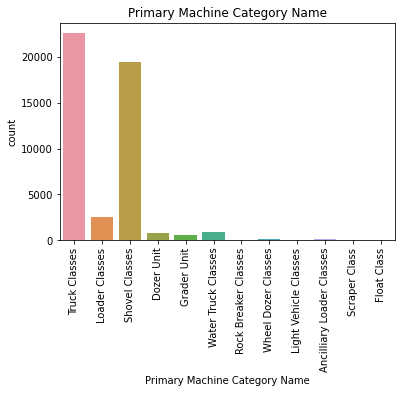

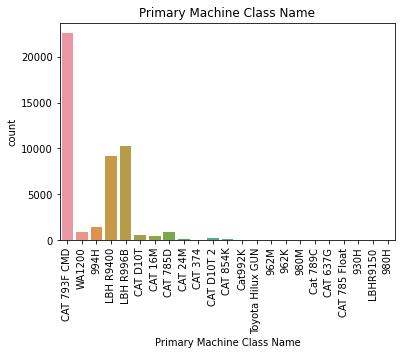

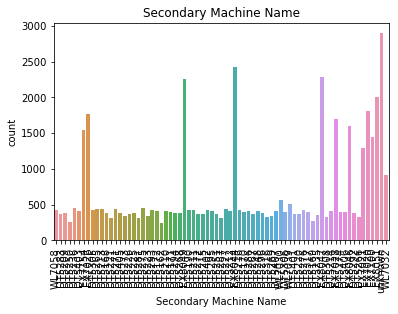

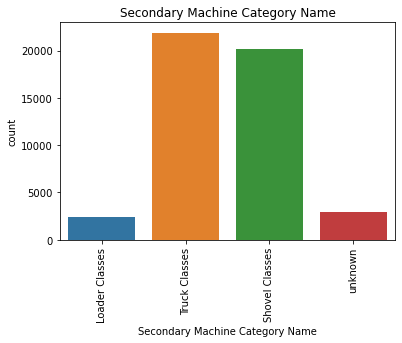

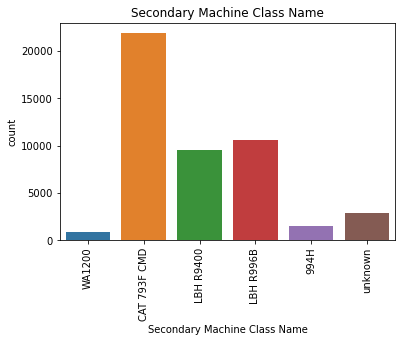

In [59]:
for column in Cycle_Master_obj[1:]:
    sns.countplot(x= column, data = Cycle_Master)
    plt.xticks(rotation=90)
    plt.title(column)
    plt.show()

In [61]:
cycle_num = Cycle_Master.select_dtypes(exclude='object').columns

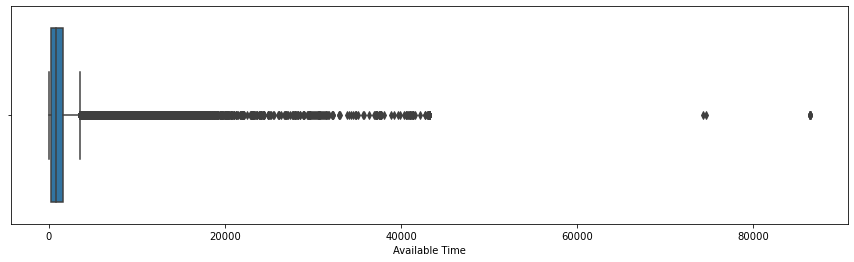

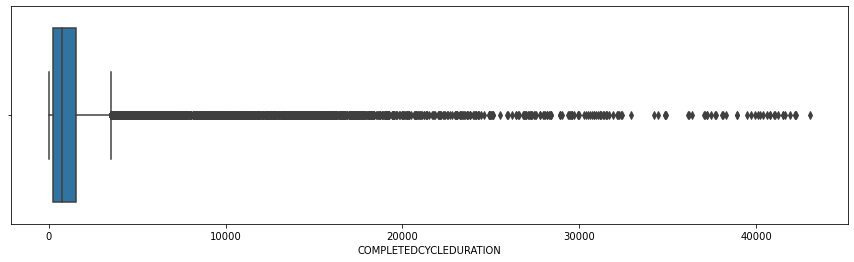

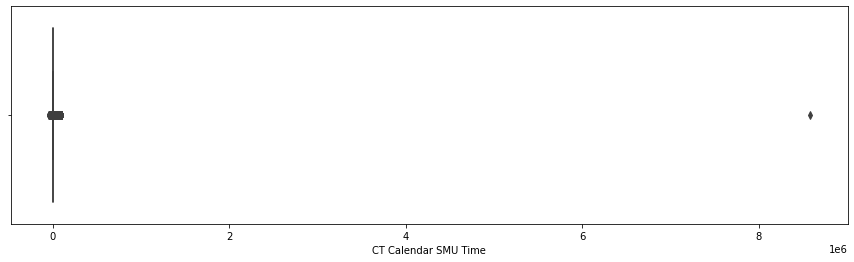

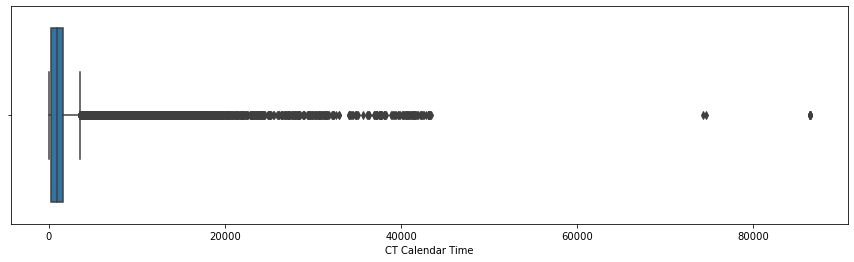

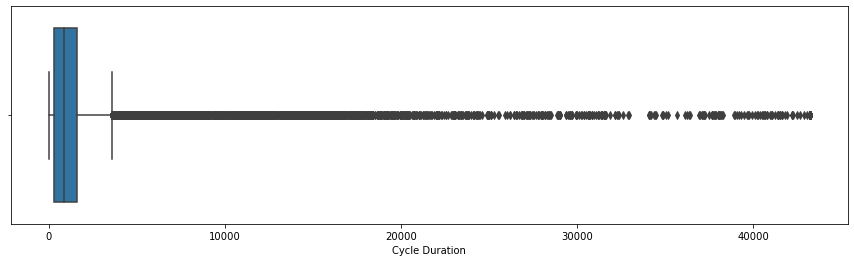

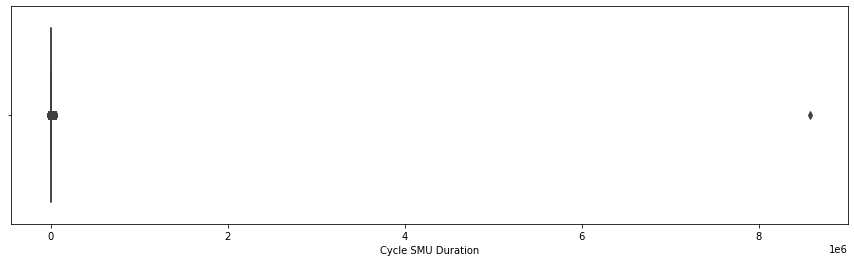

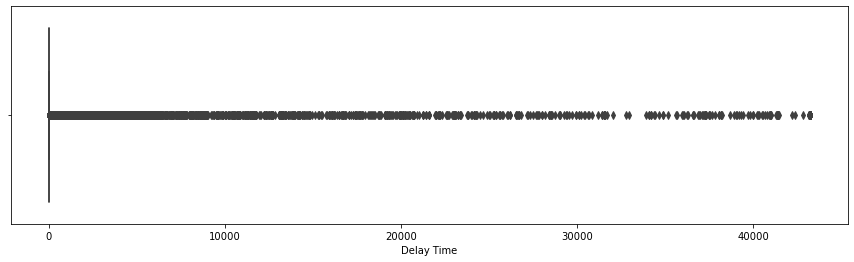

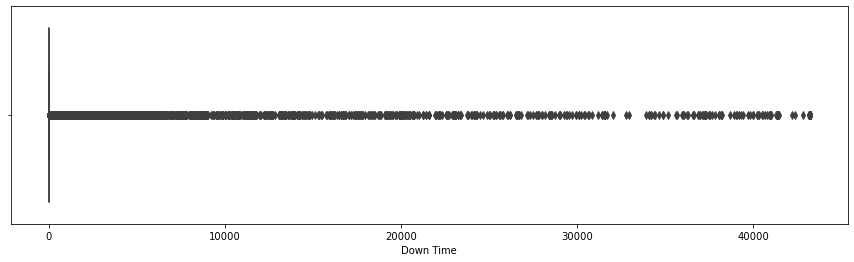

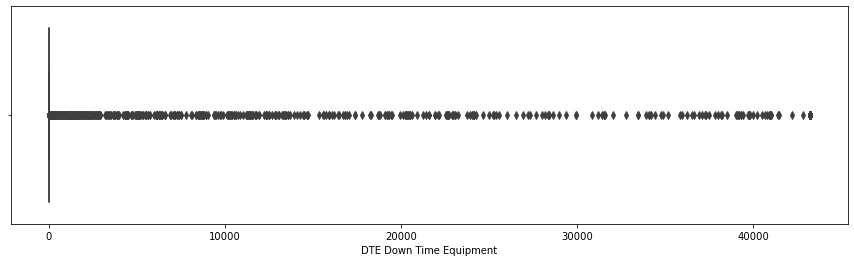

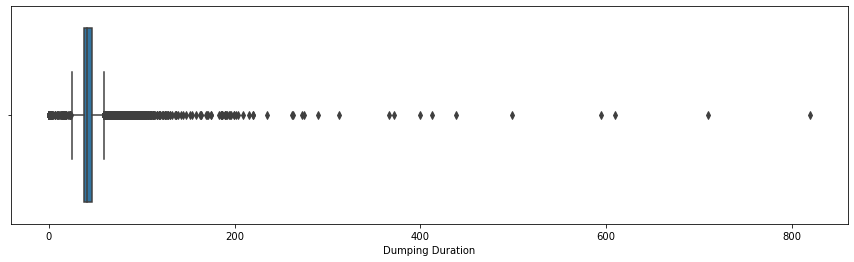

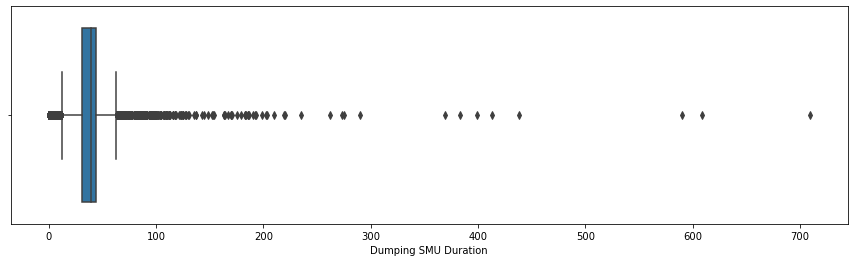

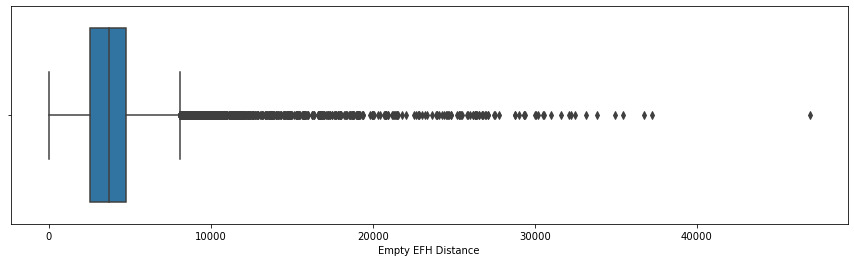

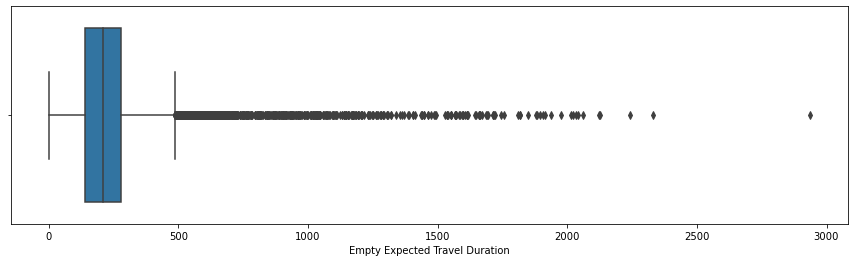

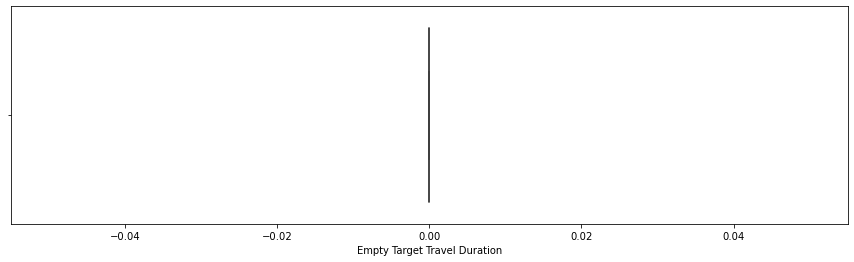

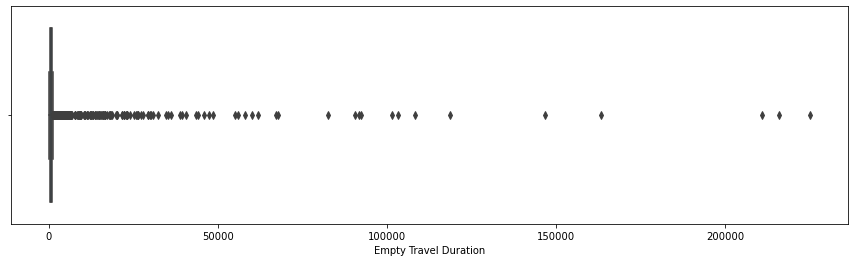

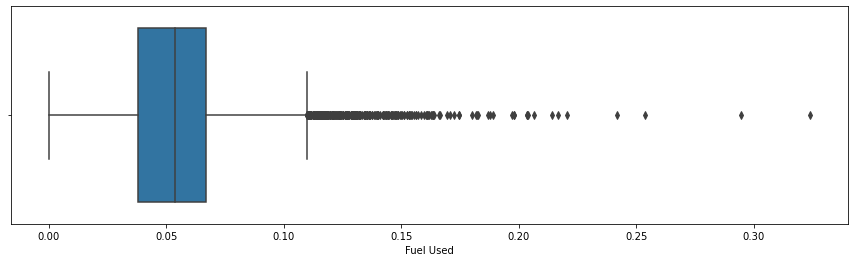

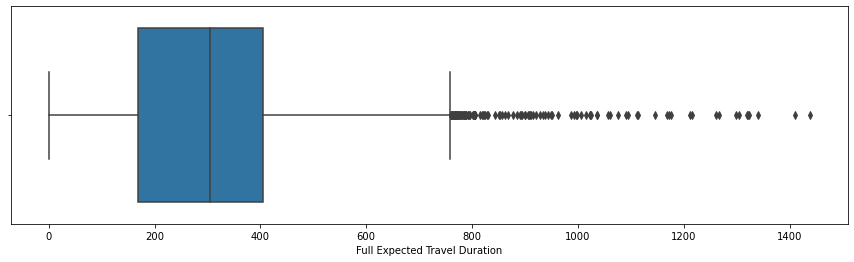

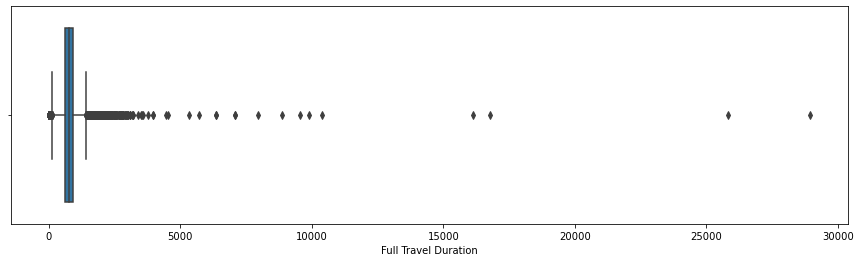

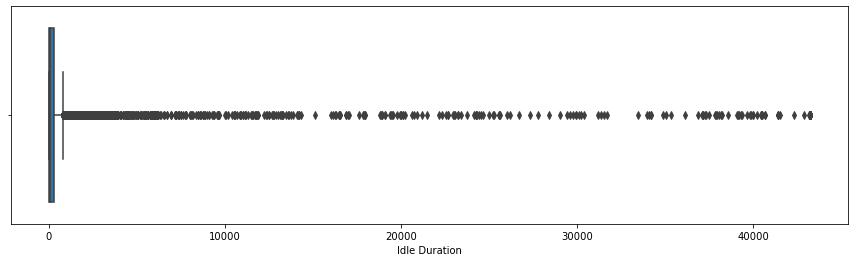

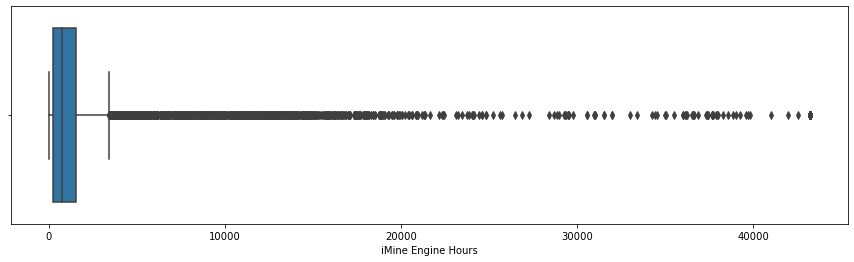

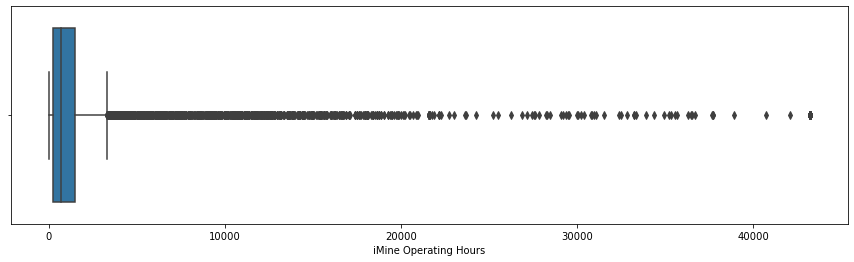

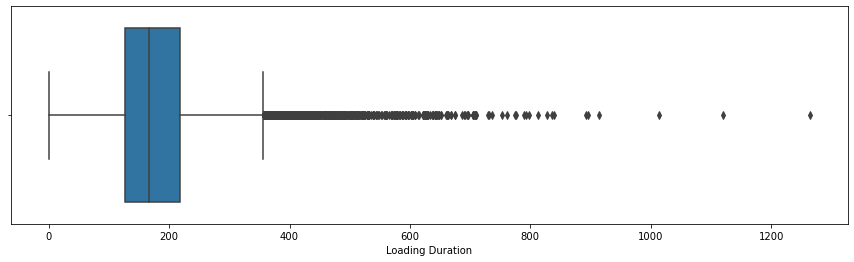

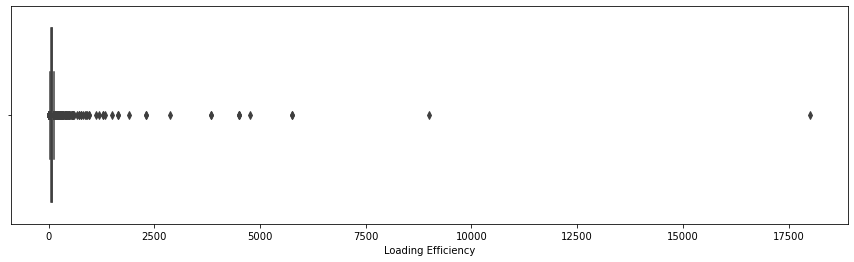

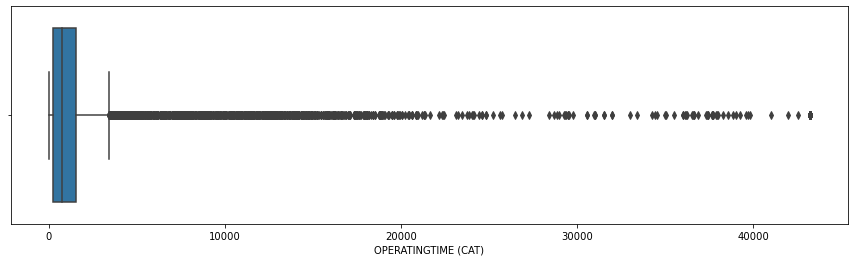

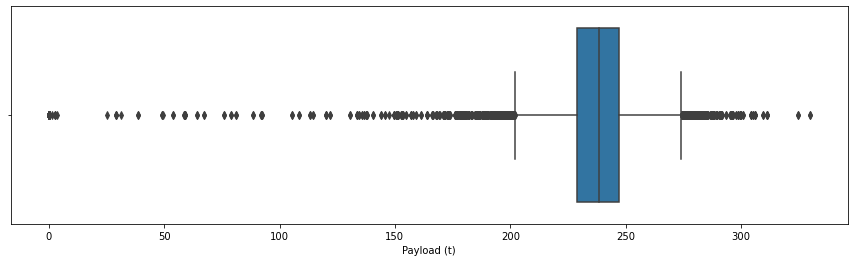

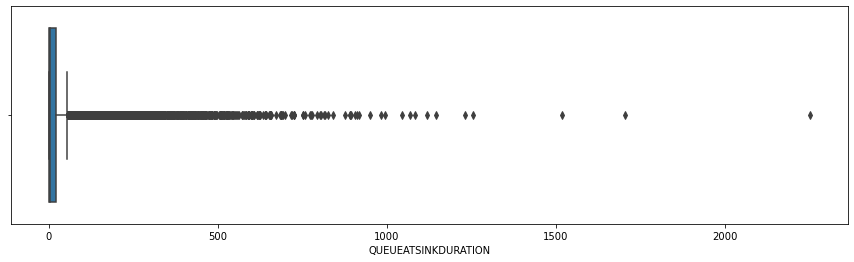

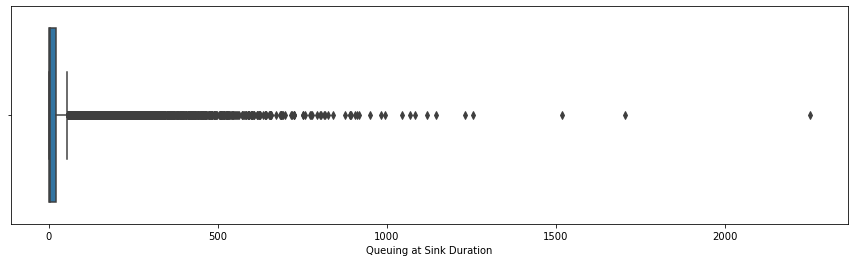

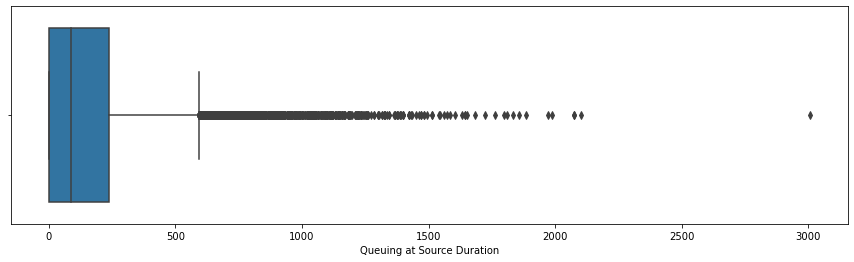

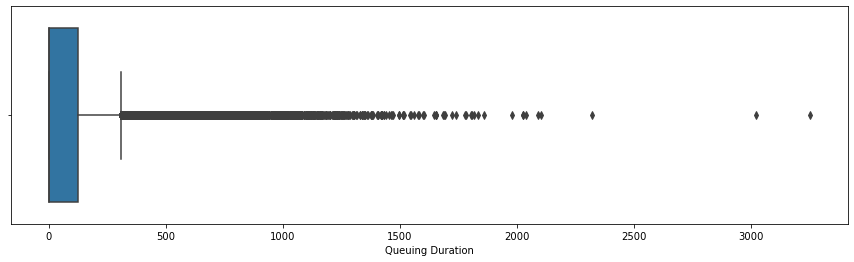

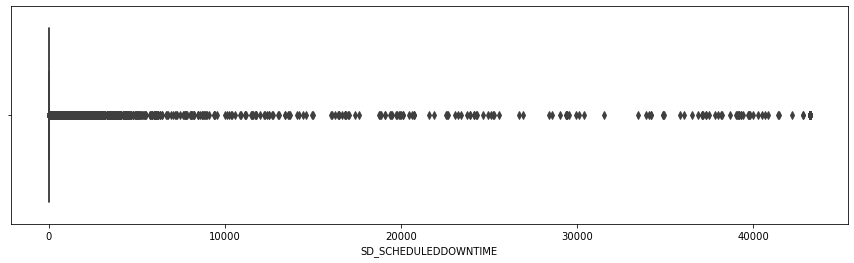

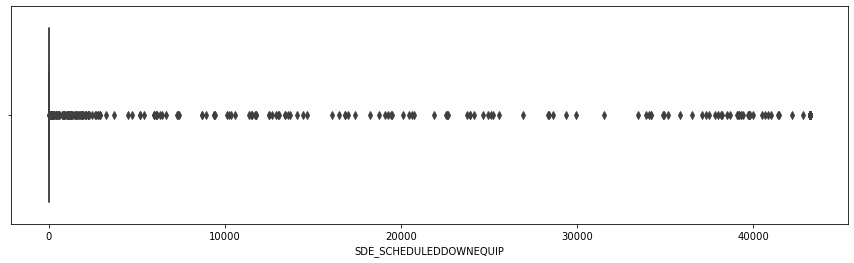

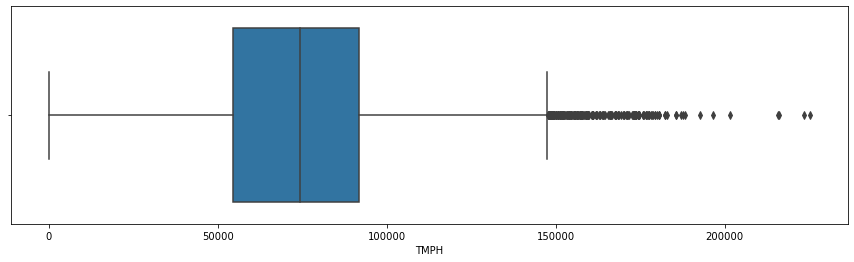

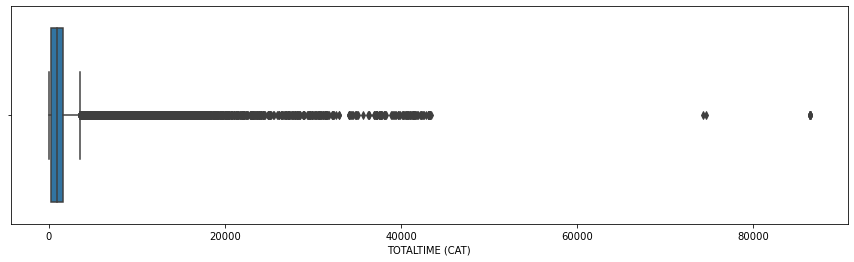

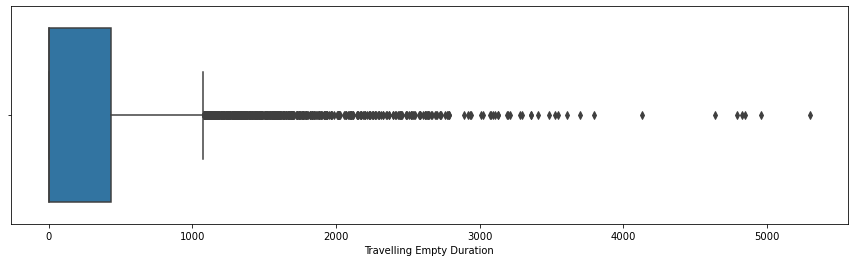

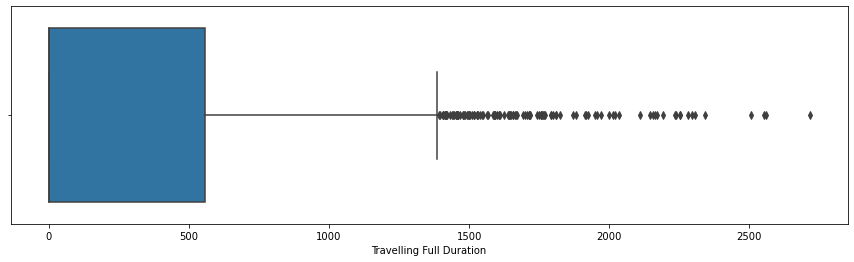

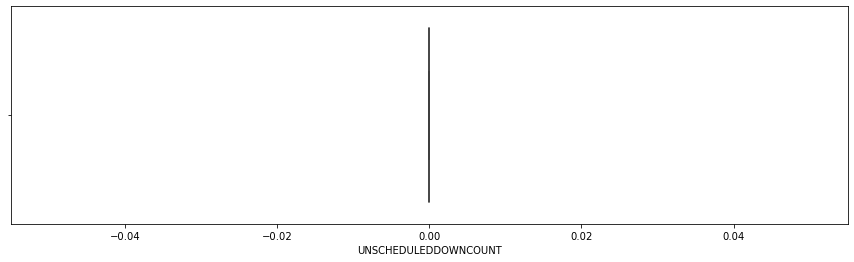

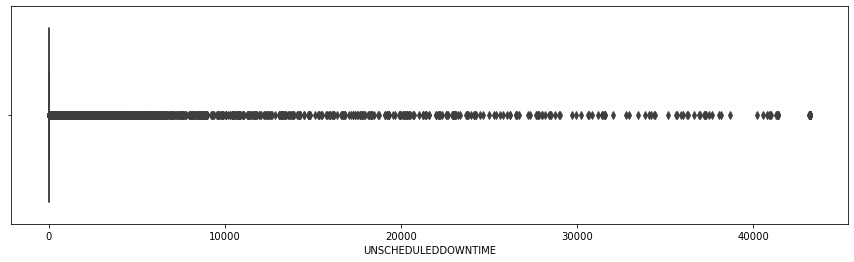

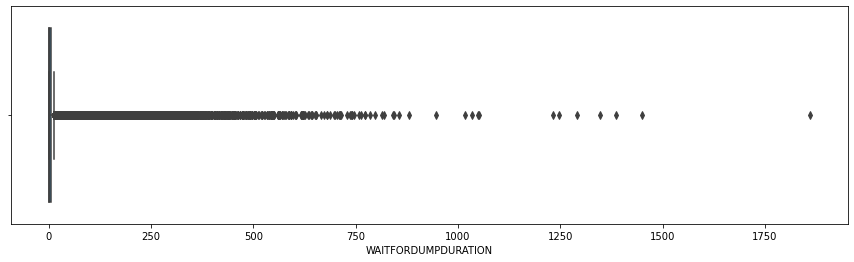

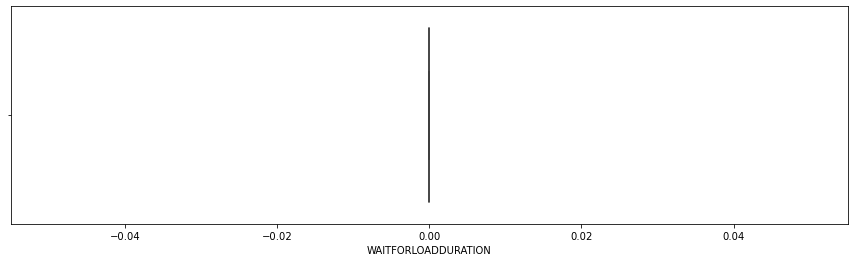

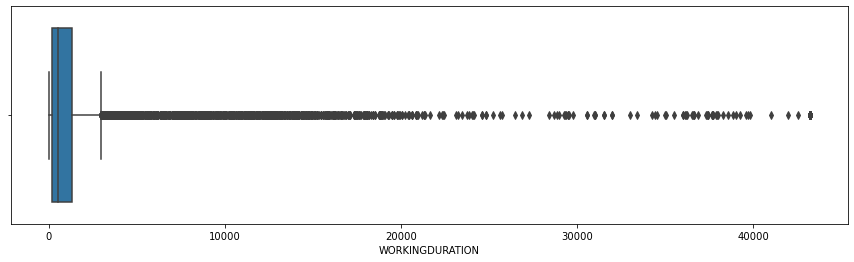

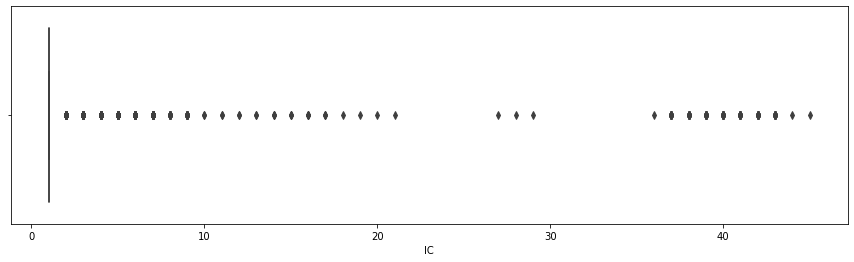

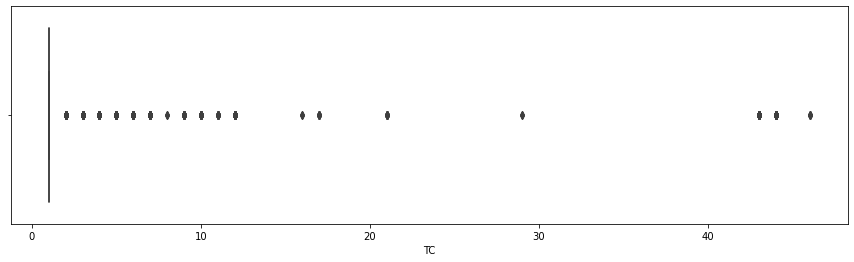

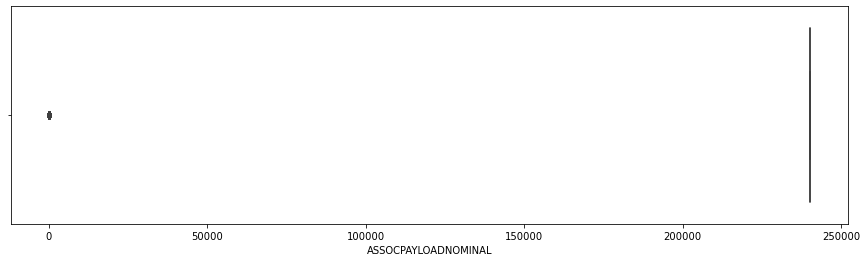

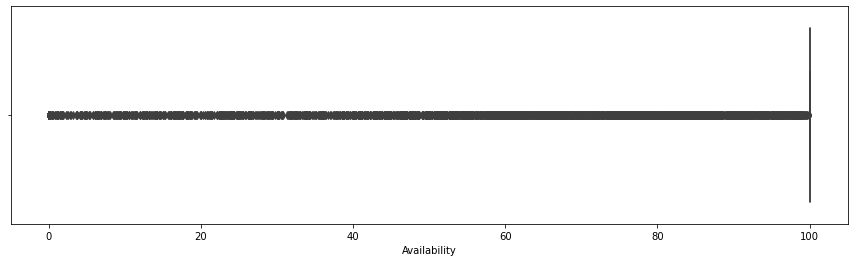

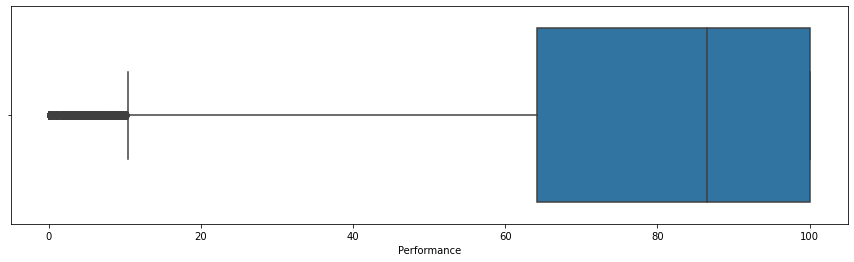

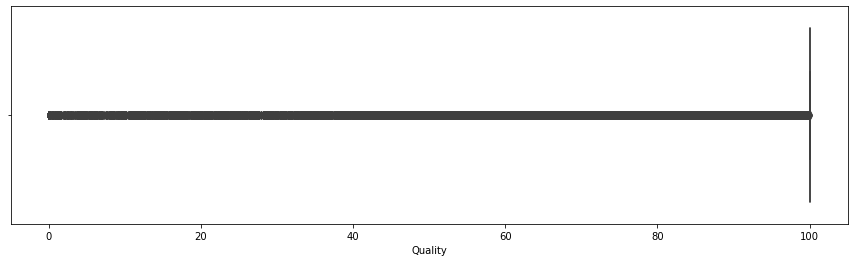

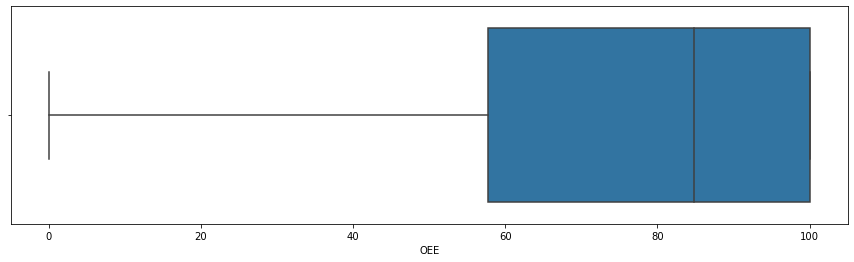

In [63]:
for i in cycle_num[1:]:
    plt.figure(figsize=(15,4))
    sns.boxplot(Cycle_Master[i])
    plt.show()